![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [2]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [3]:
# Start coding here

# Exploracion de datos

crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [4]:
# Which hour has the highest frequency of crimes?

crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)
crimes = crimes.drop('TIME OCC', axis=1)

In [5]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


<Axes: xlabel='HOUR OCC', ylabel='count'>

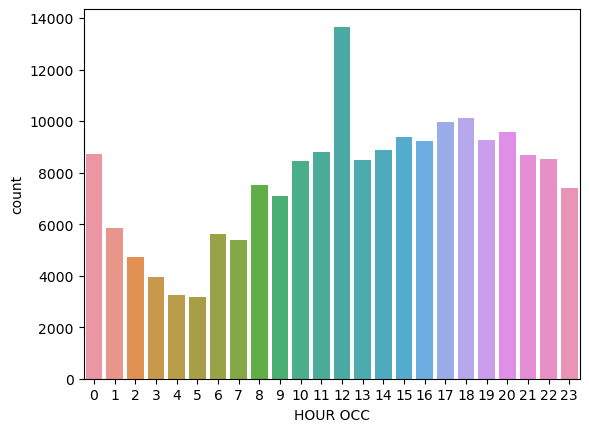

In [6]:
sns.countplot(data=crimes, x="HOUR OCC")

In [7]:
peak_crime_hour = crimes["HOUR OCC"].mode()[0]
peak_crime_hour

12

In [8]:
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

night_filter = (crimes['HOUR OCC'] >= 20) | (crimes['HOUR OCC'] <= 4)
night_crime = crimes[night_filter]
night_crime.head()

,DR_NO,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
8,231207476,2023-02-27,2020-08-15,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
16,220316688,2022-09-12,2020-09-11,Southwest,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,27,F,O,NaN,Invest Cont,1300 W 37TH DR,21
30,221314362,2022-07-11,2020-04-07,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23


In [9]:
night_crime_locations = night_crime.groupby('AREA NAME')['HOUR OCC'].count()
peak_night_crime_location = night_crime_locations.sort_values(ascending=False).idxmax()
peak_night_crime_location

'Central'

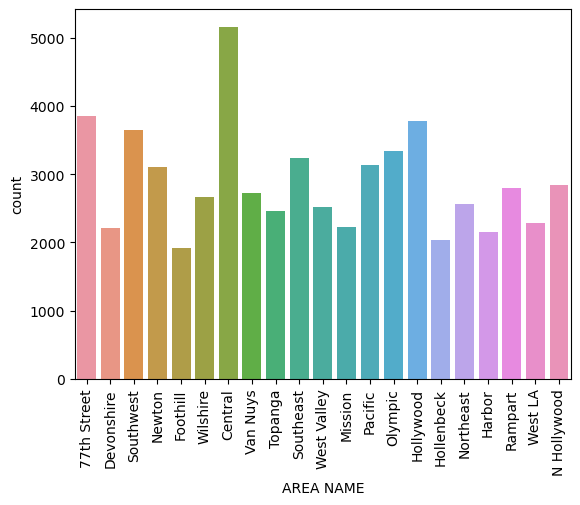

In [10]:
plt.xticks(rotation=90)
sns.countplot(data=night_crime, x="AREA NAME" )
plt.show()

In [11]:
# Identifying the number of crimes committed against victims of different age groups

labels_age = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
bins_age=[0, 17, 25, 34, 44, 54, 64, crimes['Vict Age'].max()]

crimes['victim_ages'] = pd.cut(crimes['Vict Age'], bins=bins_age, labels=labels_age)
number_of_crimes_victims_by_age = crimes['victim_ages'].value_counts()
number_of_crimes_victims_by_age
crimes = crimes.drop('Vict Age', axis=1)

<Axes: xlabel='victim_ages', ylabel='count'>

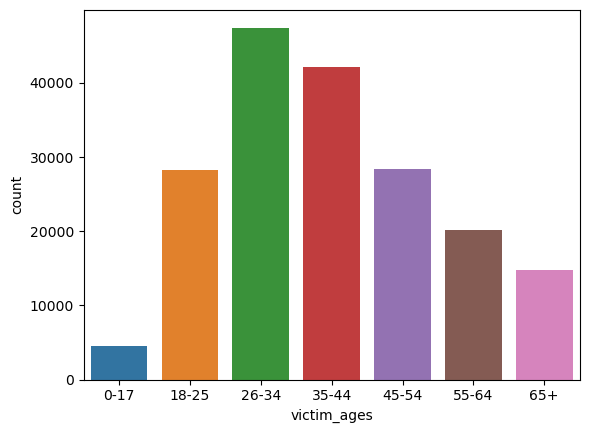

In [12]:
sns.countplot(data=crimes, x="victim_ages" )

Vict Sex          F      M     X
Vict Descent                    
-                 0      1     0
A              2663   2851     5
B             19762  15110    57
C               592    612     6
D                11     10     0
F               621    586     4
G                 7      7     0
H             37683  36375    62
I               148    170     4
J               211    221     1
K               618    768     3
L                15      5     0
O              6801   9501    28
P                51     32     0
S                10      6     0
U                26     28     0
V               176    148     3
W             20100  24791    92
X               304   1696  2546
Z                54     90     1


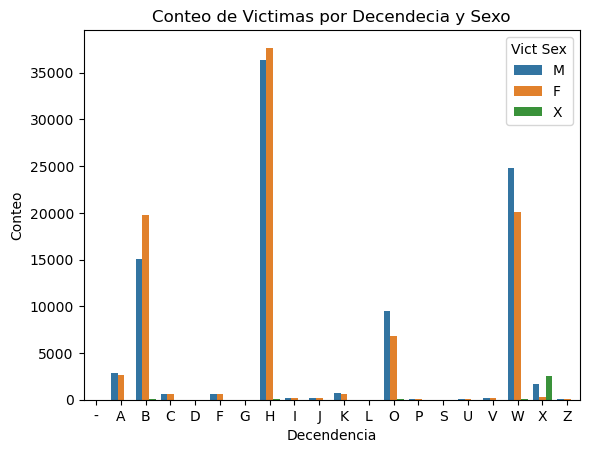

In [55]:
grouped = crimes.groupby(['Vict Descent'])['Vict Sex'].value_counts()
# Paso 2: Convertir a DataFrame
grouped_df = grouped.reset_index(name='Count')

# Paso 3: Ordenar el DataFrame
grouped_df = grouped_df.sort_values(by=['Vict Descent', 'Count'], ascending=[True, False])

# Eliminar datos raros '
grouped_df = grouped_df[grouped_df['Vict Sex'] != 'H']

# Mostrar el DataFrame ordenado
grouped_df

pivot_table = grouped_df.pivot_table(index='Vict Descent', columns='Vict Sex', values='Count', fill_value=0)

# Mostrar la tabla de contingencia
print(pivot_table)

sns.barplot(data=grouped_df, x='Vict Descent', y='Count', hue='Vict Sex')
plt.title('Conteo de Victimas por Decendecia y Sexo')
plt.xlabel('Decendencia')
plt.ylabel('Conteo')
plt.show()